<a href="https://colab.research.google.com/github/AV-Gorshkov/Python_netology/blob/main/PY_%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B_%D0%BE%D0%B1%D1%89%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# изменим размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

In [3]:
#  загрузка данных
param = r'/content/drive/My Drive/Нетология/ML/Временные_ряды/1_знакомство_с_временными_рядами/Series/'

file_1 = 'daily-total-female-births-in-cal.csv'
file_2 = 'international-airline-passengers.csv'
file_3 = 'mean-monthly-air-temperature-deg.csv'
file_4 = 'monthly-boston-armed-robberies-j.csv'
file_5 = 'monthly-sales-of-company-x-jan-6.csv'
file_6 = 'weekly-closings-of-the-dowjones-.csv'

female_births = pd.read_csv(f'{param}{file_1}', sep = ',')
airlines_passengers = pd.read_csv(f'{param}{file_2}', sep = ',')
mean_monthly_temp = pd.read_csv(f'{param}{file_3}', sep = ',')
robberies_in_boston = pd.read_csv(f'{param}{file_4}', sep = ',')
sales_of_company_x = pd.read_csv(f'{param}{file_5}', sep = ',')
dowjones_closing = pd.read_csv(f'{param}{file_6}', sep = ',')

In [4]:
# Тест Дики-Фуллера
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [5]:
#  визуализация графиков
def tsplot(y, name, lags=None, figsize = rcParams['figure.figsize'], style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='Green', label='Or')
        ts_ax.set_title(name)

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

#1. Датасет "Daily total female births in California"

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


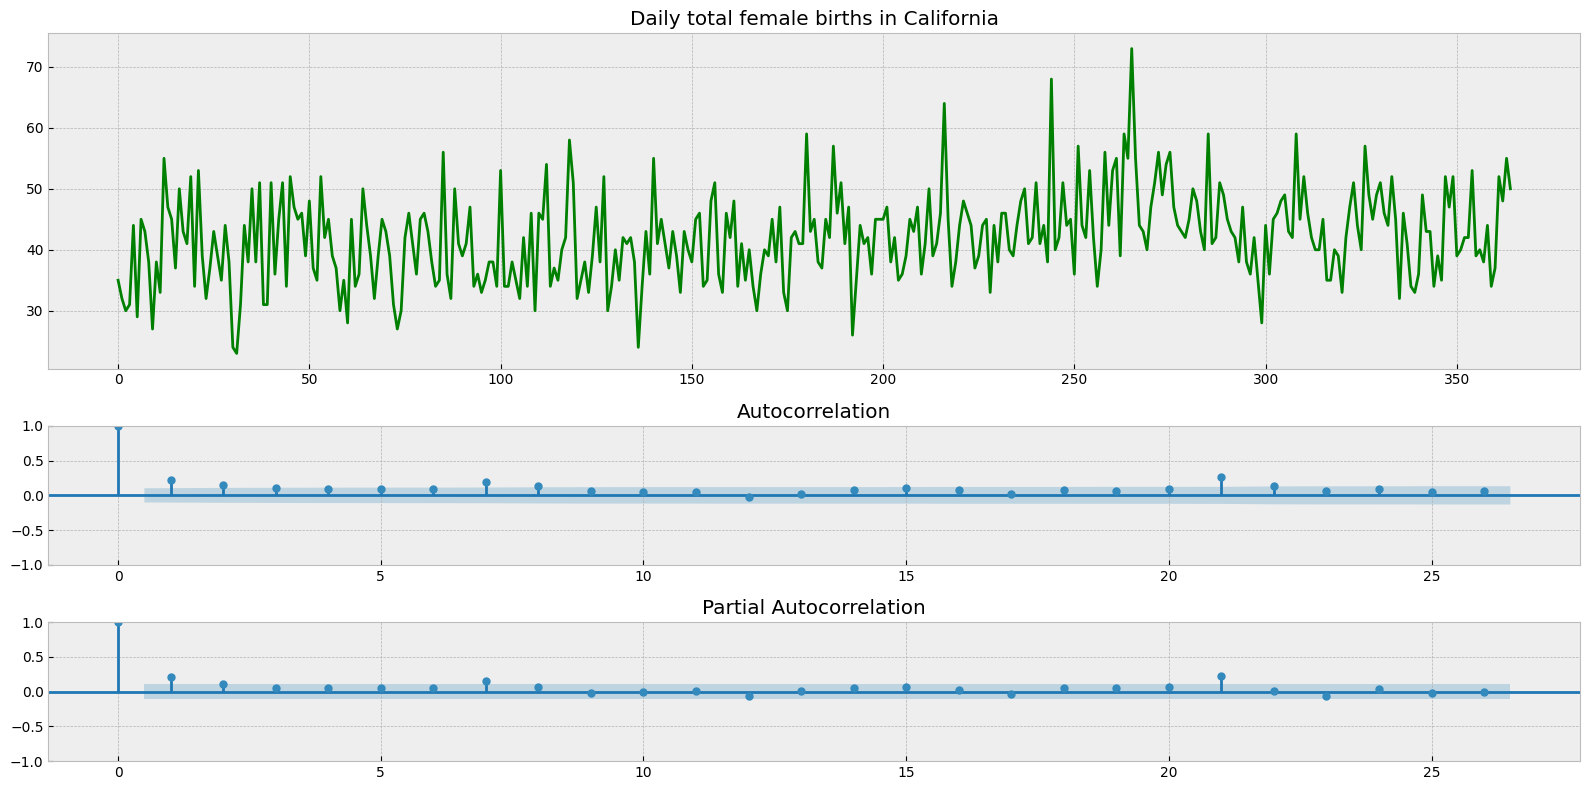

In [6]:
# Визуализация графика, тест Дики-Фуллера, график коррелограммы

name ='Daily total female births in California'

series = female_births['Count']

tsplot(series, name)

тест Дики-Фуллера p < 0.05, графики коррелограмм не отвергают гипотезу о стационарности ряда.

Временной ряд является стационарным

#2. Датасет "International airline passengers: monthly totals in thousands"

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


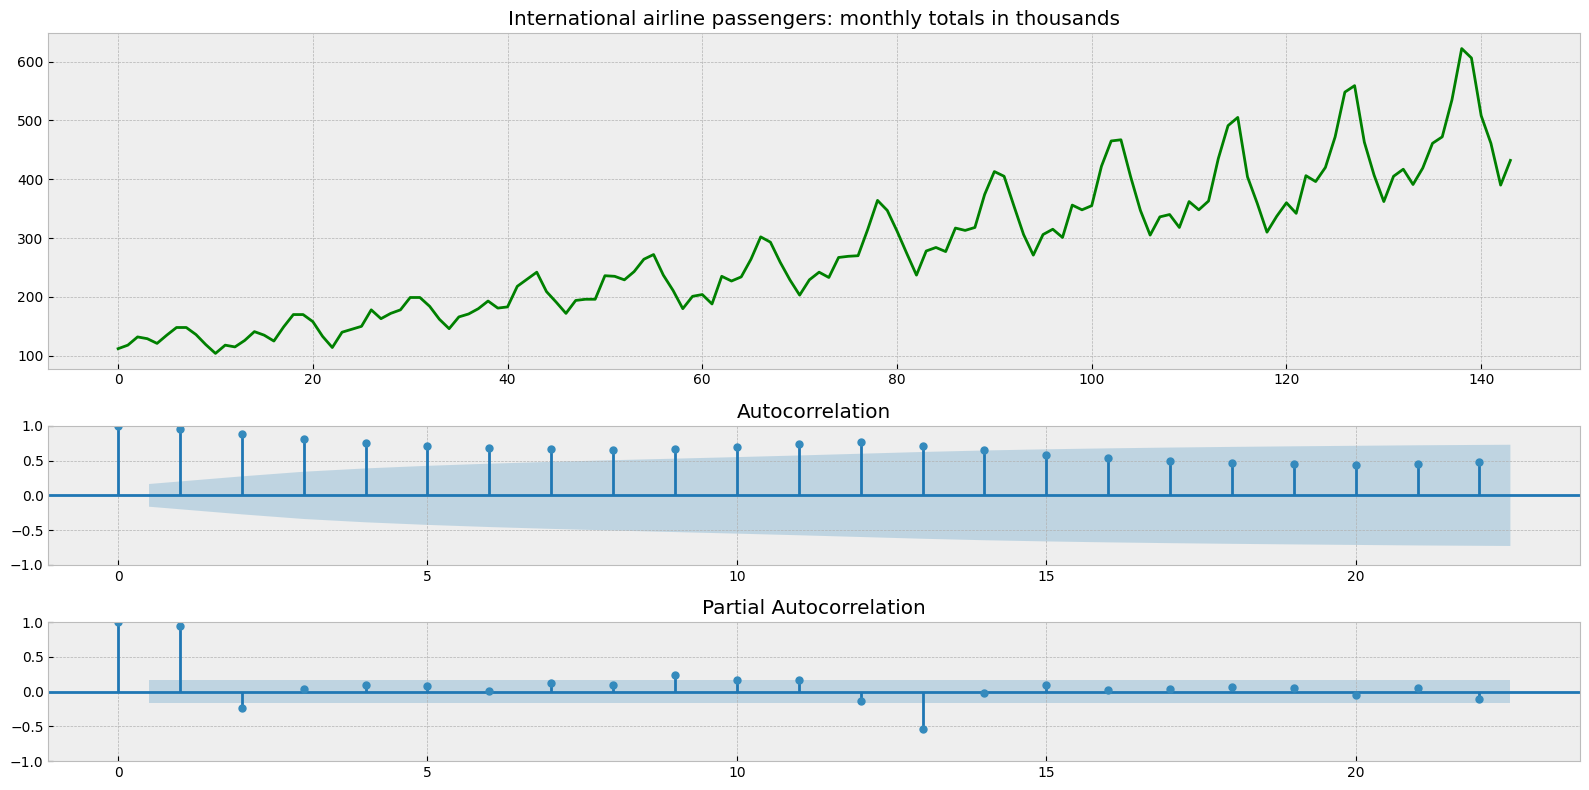

In [7]:
name = 'International airline passengers: monthly totals in thousands'

series = airlines_passengers['Count']

tsplot(series, name)

тест Дики-Фуллера p > 0.05, графики коррелограмм отвергают гипотезу о стационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


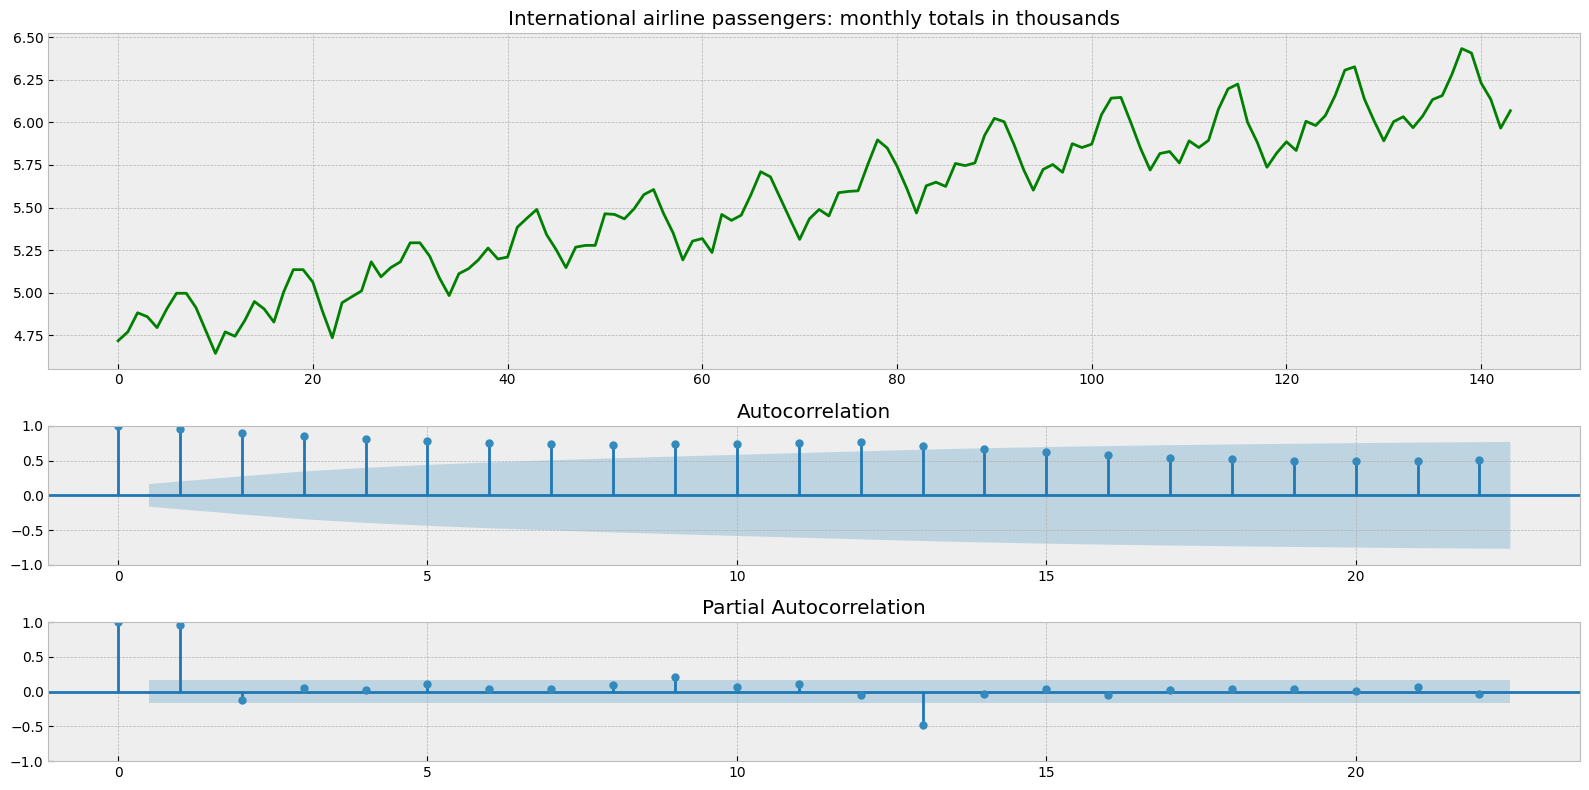

In [8]:
# на графике заметно изменение дисперсии.
# уберем изменение дисперсии при помощи преобразования Бокса-Кокса
series = boxcox(series, 0)

tsplot(series, name)

Размаха дисперсии нет.

тест Дикки-Фуллера p>0.05, графики коррелограмм не отвергает гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


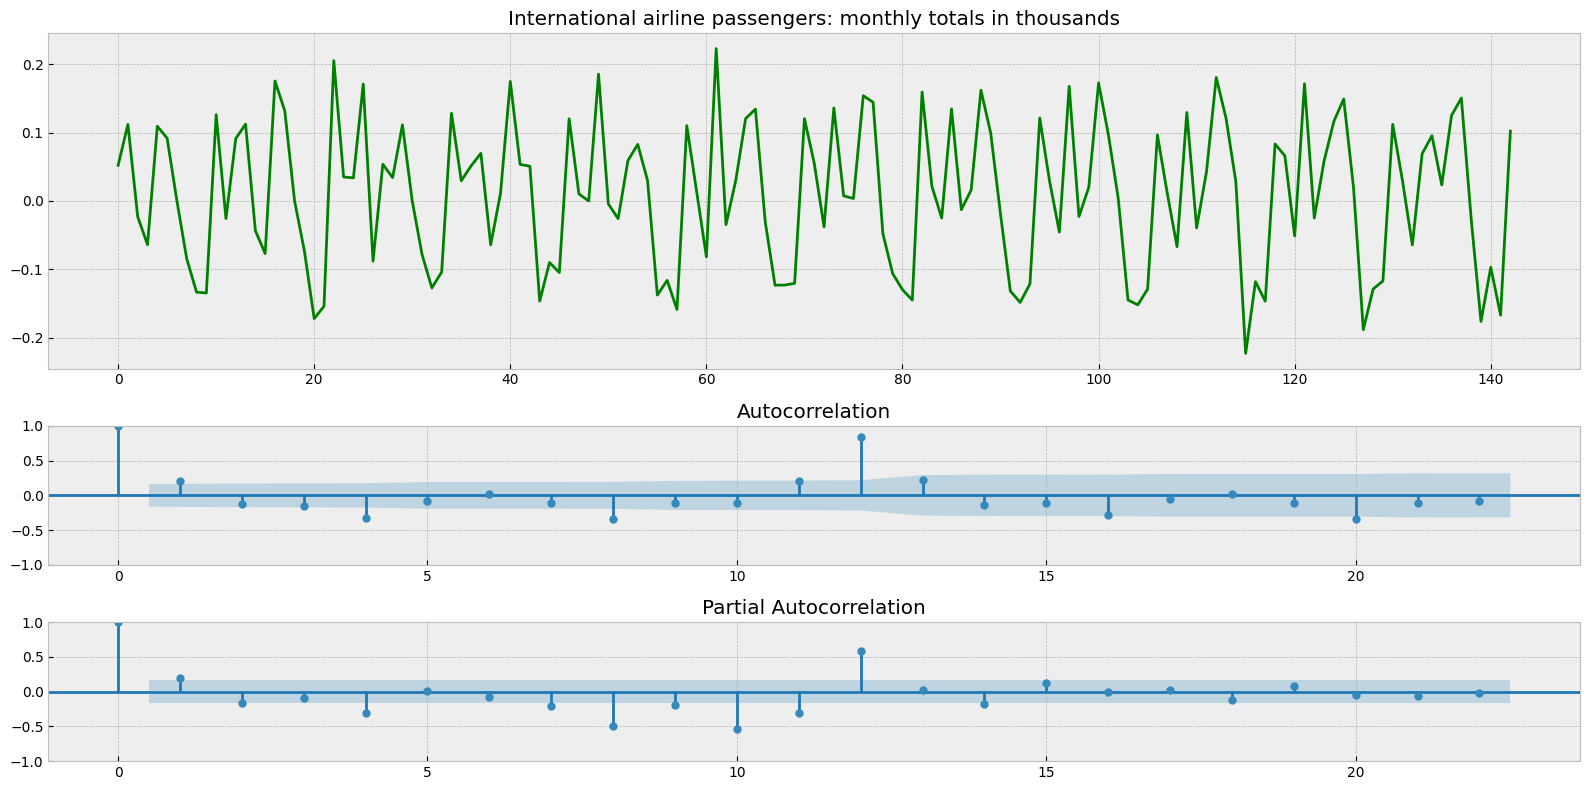

In [9]:
# По графику ряда заметно наличие тренда.
#  Уберем его дифференцированием.

series = series[1:] - series[:-1]

tsplot(series, name)

Тренда нет.

тест Дикки-Фуллера p>0.05, графики коррелограмм не отвергает гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                -1.531765e+01
p-value                        4.104887e-28
#Lags Used                     6.000000e+00
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


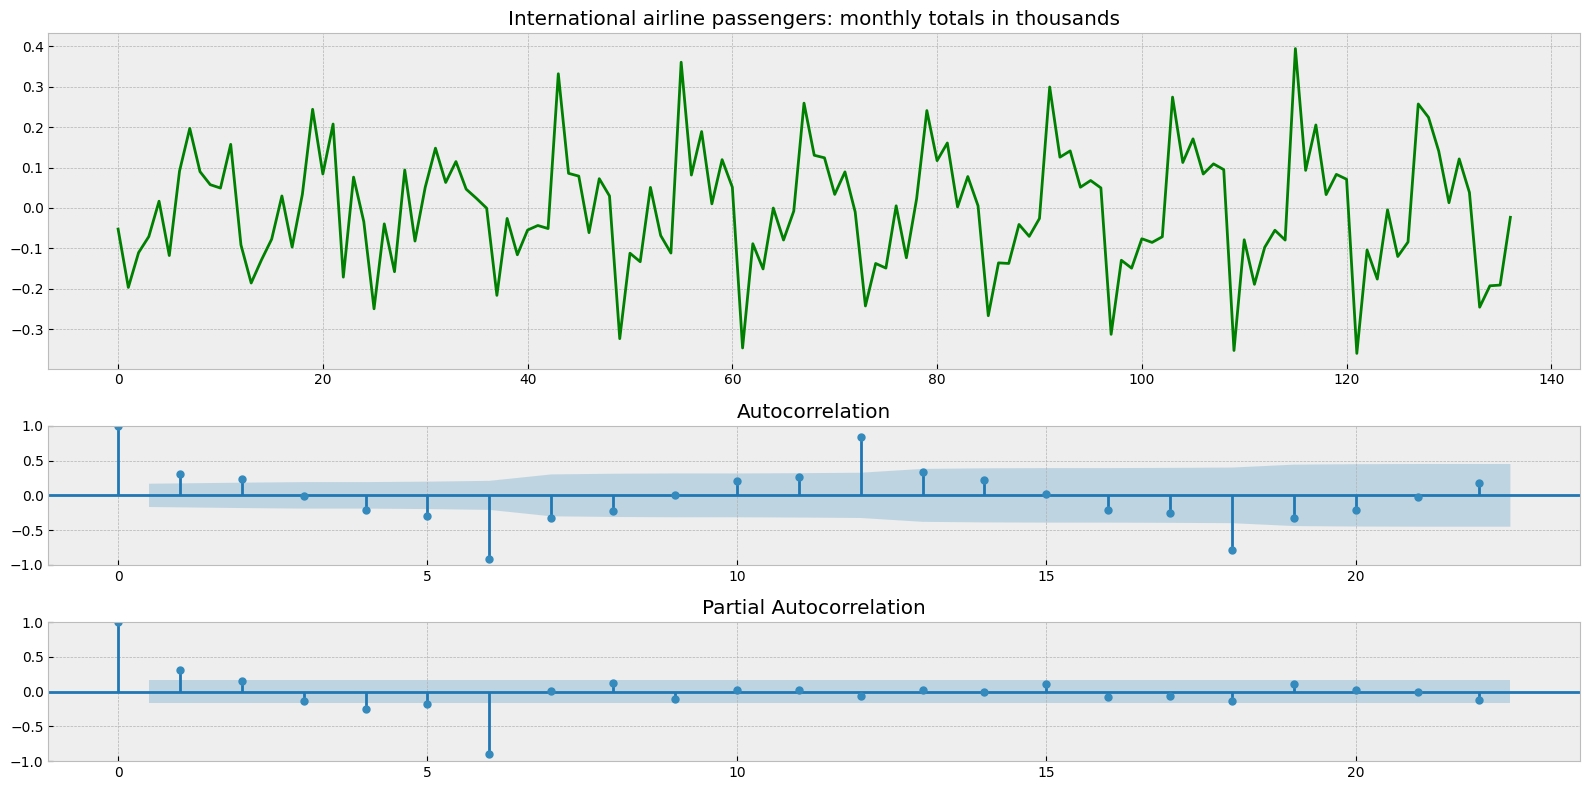

In [10]:
# Уберем влияние сезонности
series = series[6:] - series[:-6]

tsplot(series, name)

тест Дики-Фуллера p < 0.05, графики коррелограмм не отвергают гипотезу о стационарности ряда.

Временной ряд является стационарным

#3. Датасет "Mean monthly air temperature (Deg. F) Nottingham Castle"

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


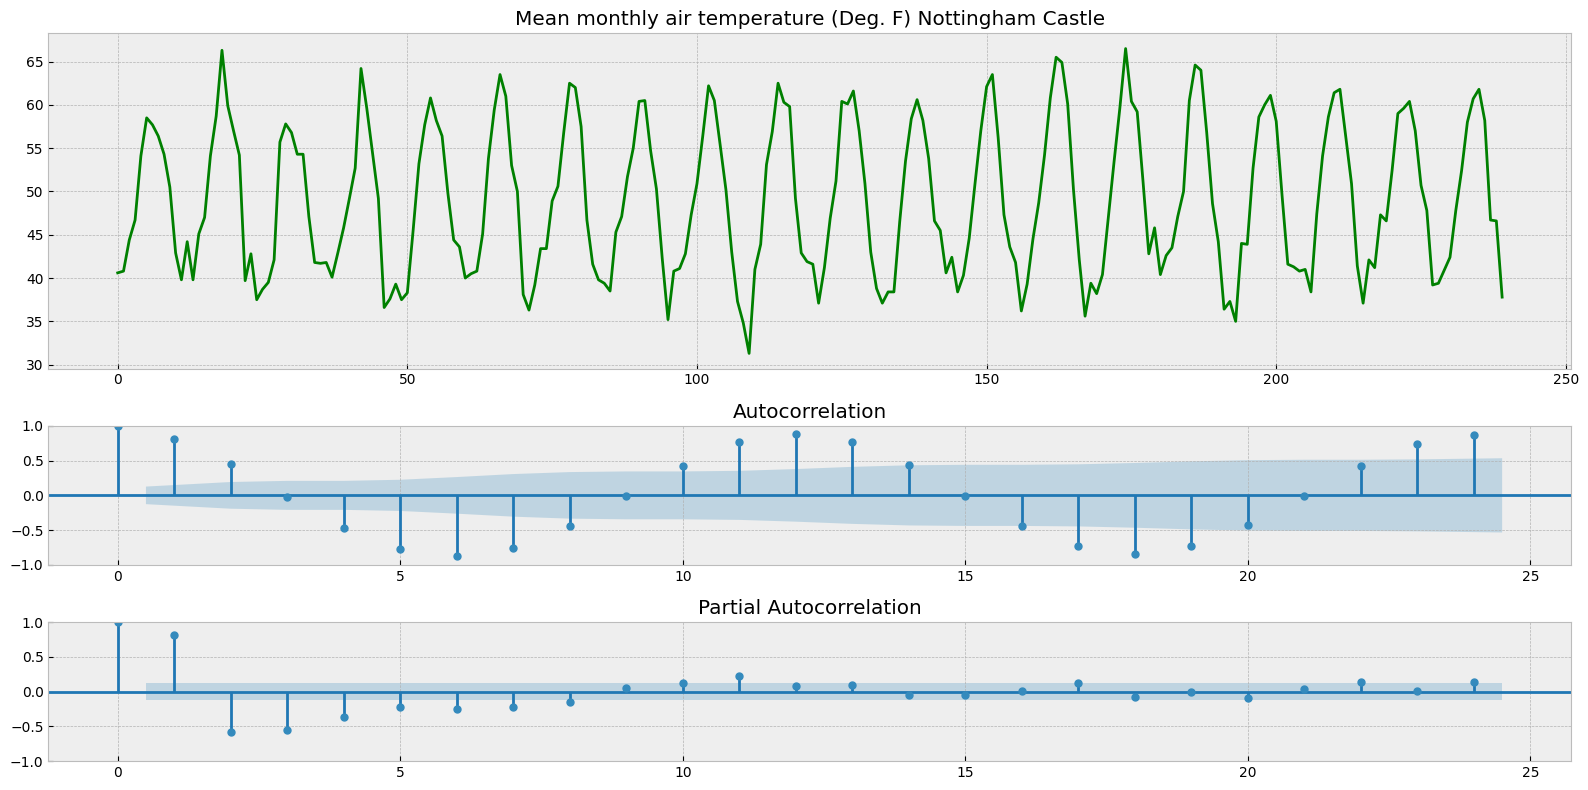

In [11]:
name = 'Mean monthly air temperature (Deg. F) Nottingham Castle'

series = mean_monthly_temp['Deg']

tsplot(series, name)

тест Дики-Фуллера p < 0.05, но на графике заметна сезоонность и изменение дисперсии.

не отвергают гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


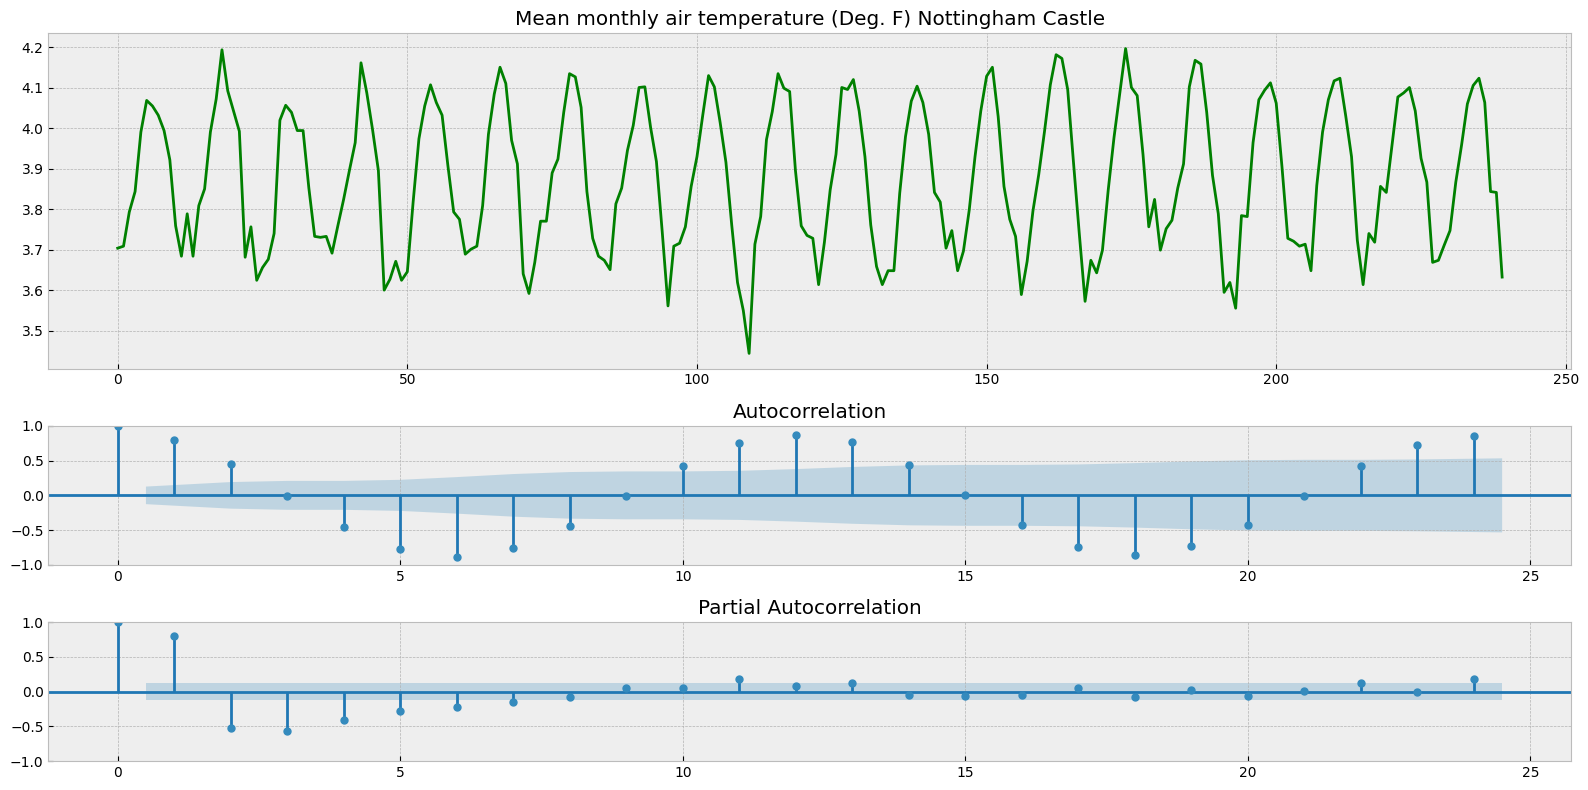

In [12]:
# уберем изменение дисперсии при помощи преобразования Бокса-Кокса
series = boxcox(series, 0)

tsplot(series, name)

Размаха дисперсии нет.

тест Дикки-Фуллера p < 0.05,но на графике заметна сезоонность

Не отвергают гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


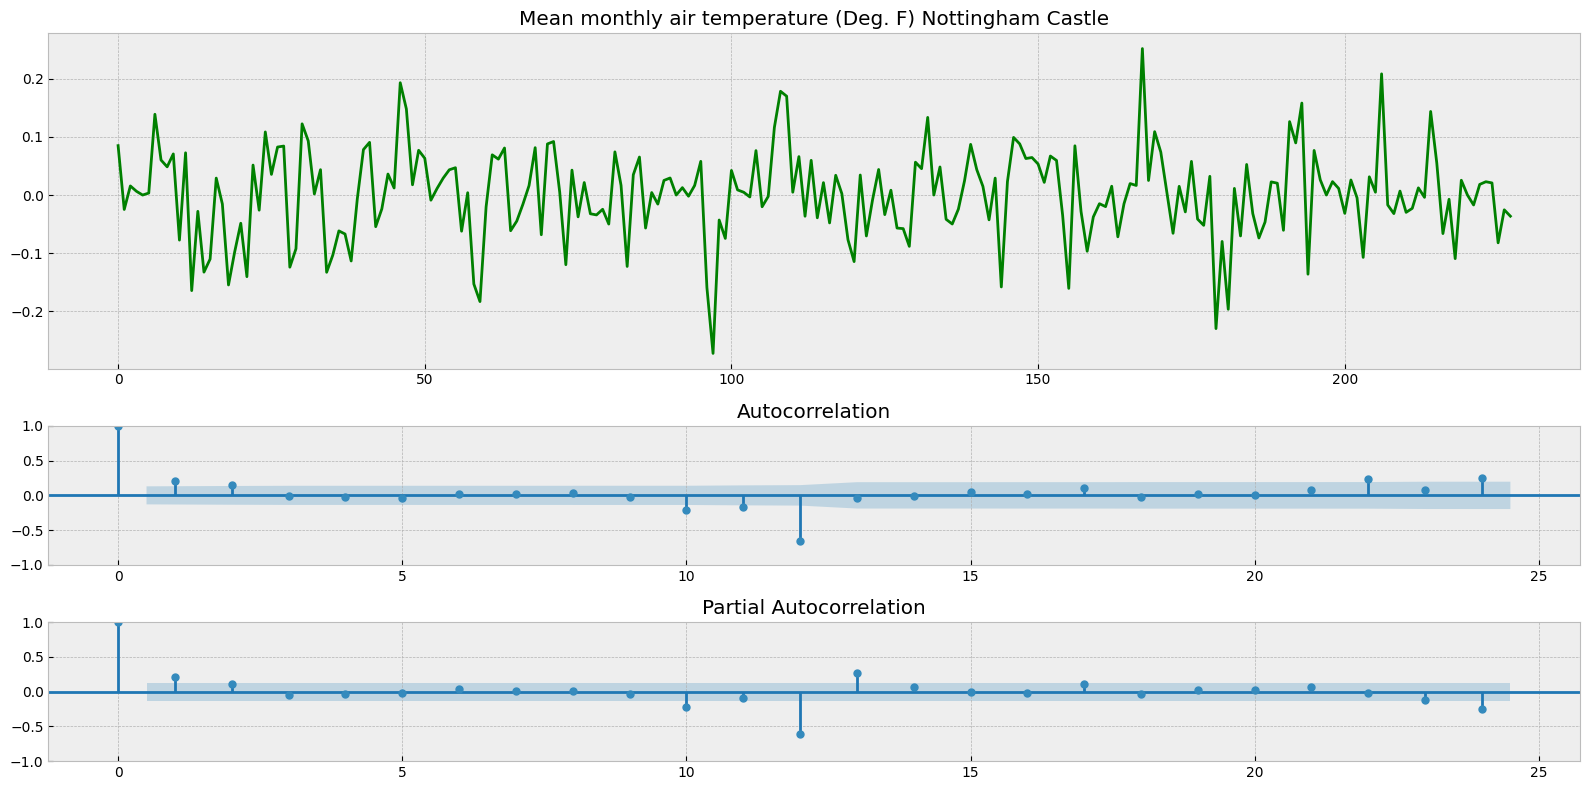

In [13]:
# Уберем влияние сезонности

series = series[12:] - series[:-12]

tsplot(series, name)

тест Дики-Фуллера p < 0.05, графики коррелограмм не отвергают гипотезу о стационарности ряда.

Временной ряд является стационарным

#4. Датасет "Monthly Boston armed robberies"

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


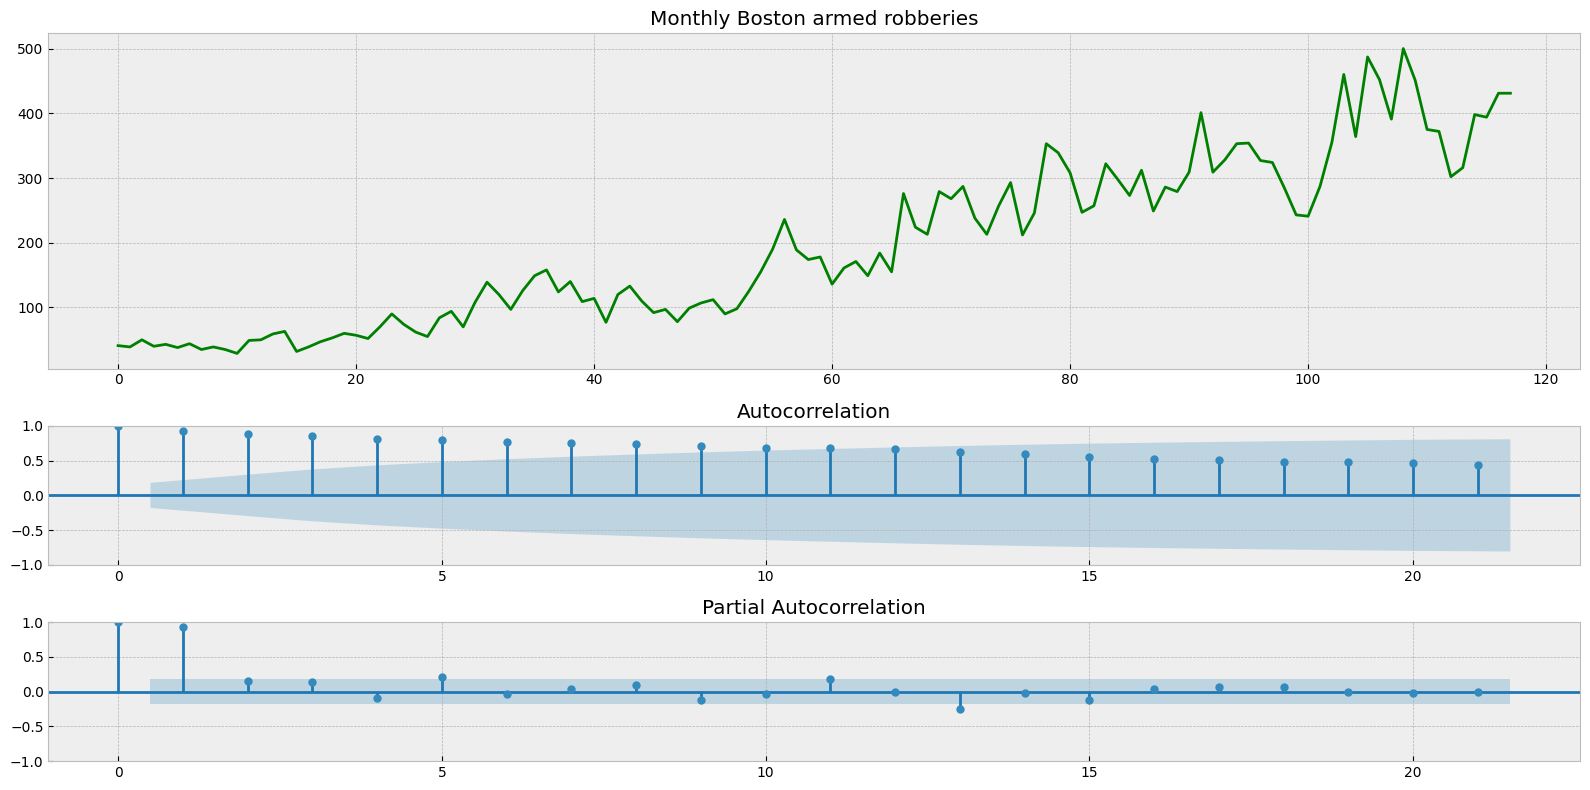

In [14]:
name = 'Monthly Boston armed robberies'

series =  robberies_in_boston['Count']

tsplot(series, name)

тест Дики-Фуллера p > 0.05, графики коррелограмм отвергают гипотезу о стационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


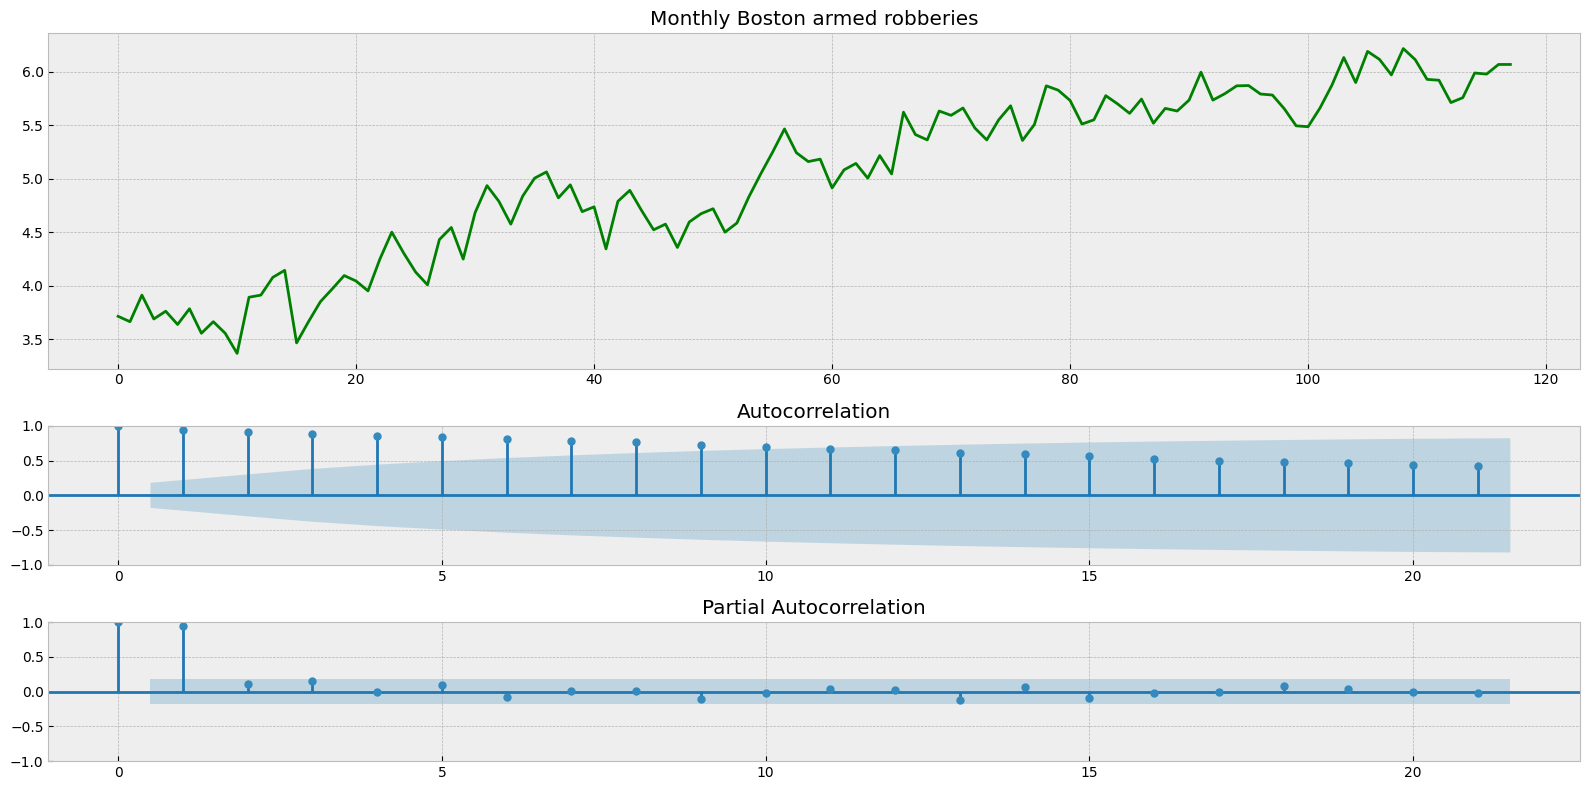

In [15]:
# на графике заметно изменение дисперсии.
# уберем изменение дисперсии при помощи преобразования Бокса-Кокса
series = boxcox(series, 0)

tsplot(series, name)

Размаха дисперсии нет.

тест Дикки-Фуллера p>0.05, графики коррелограмм не отвергает гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


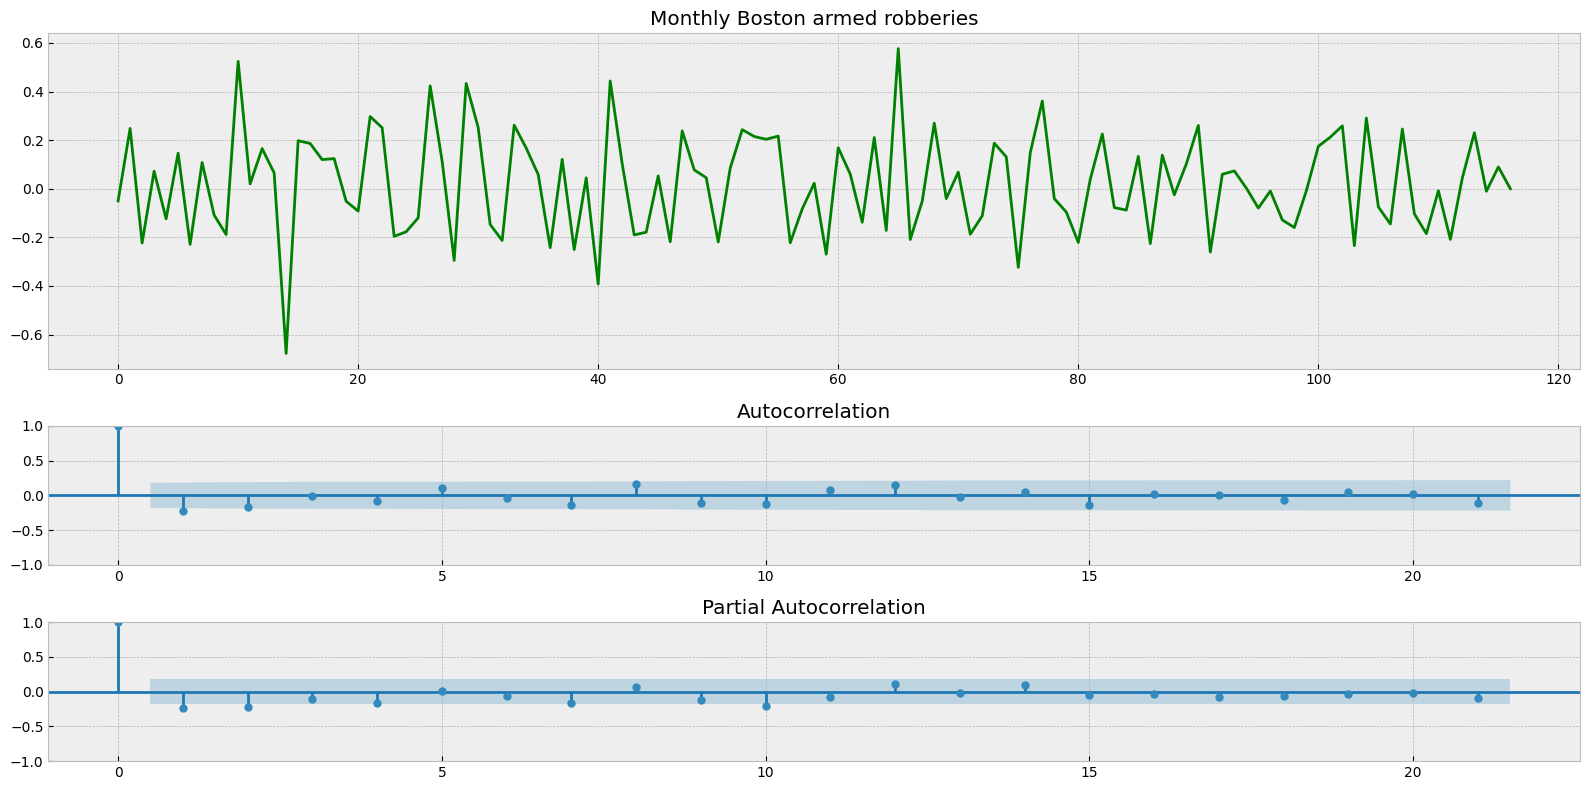

In [16]:
# По графику ряда заметно наличие тренда.
#  Уберем его дифференцированием.

series = series[1:] - series[:-1]

tsplot(series, name)

Тренда нет.

тест Дики-Фуллера p < 0.05, графики коррелограмм не отвергают гипотезу о стационарности ряда.

Временной ряд является стационарным

#5. Датасет "Monthly sales of company X"

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


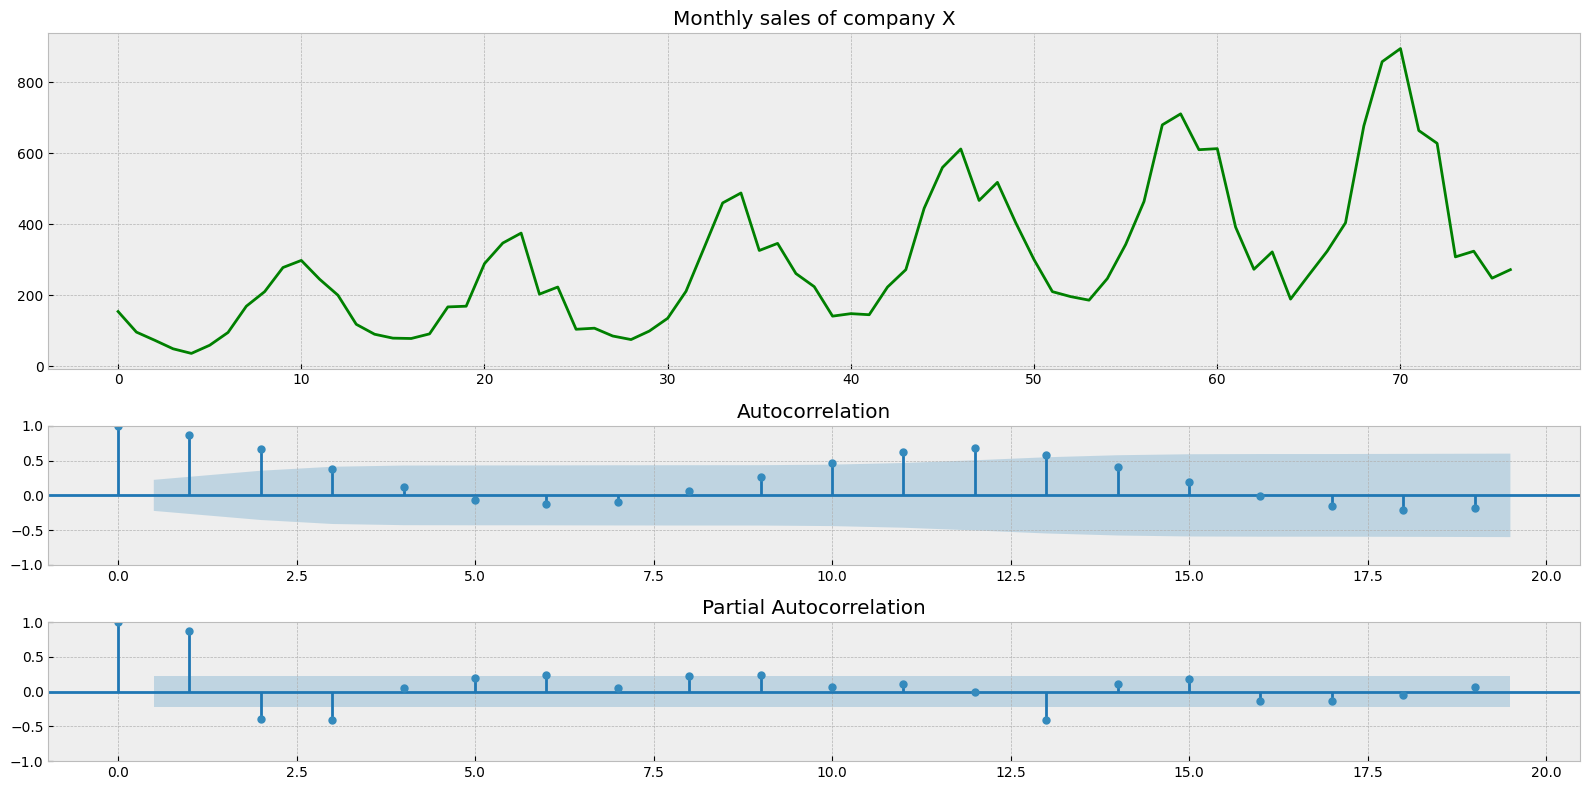

In [17]:
name = 'Monthly sales of company X'

series = sales_of_company_x['Count']

tsplot(series, name)

тест Дики-Фуллера p > 0.05, графики коррелограмм отвергают гипотезу о стационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


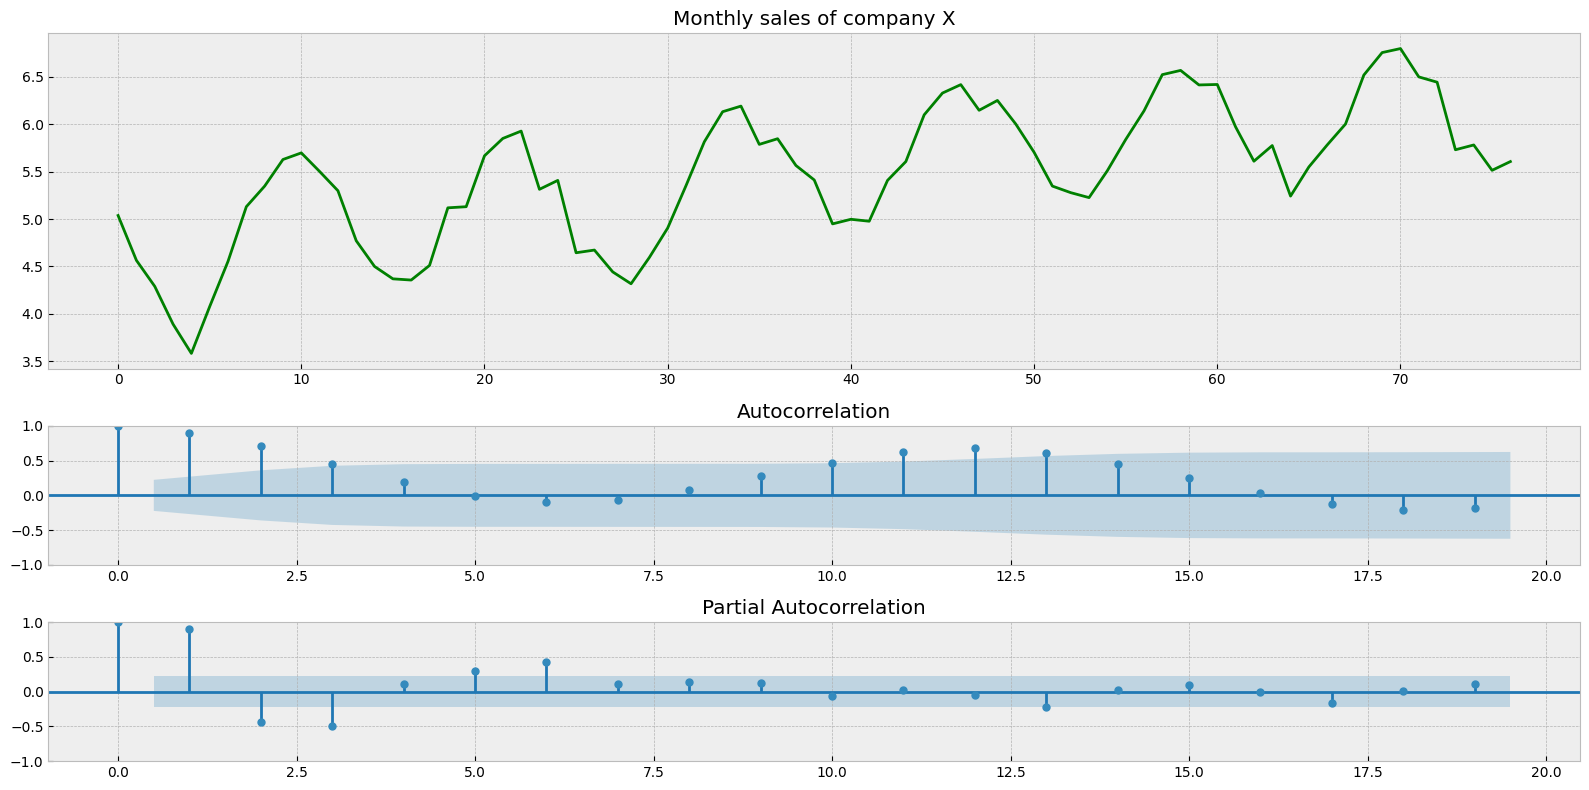

In [18]:
# на графике заметно изменение дисперсии.
# уберем изменение дисперсии при помощи преобразования Бокса-Кокса
series = boxcox(series, 0)

tsplot(series, name)

Размаха дисперсии нет.

тест Дикки-Фуллера p>0.05, графики коррелограмм не отвергает гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


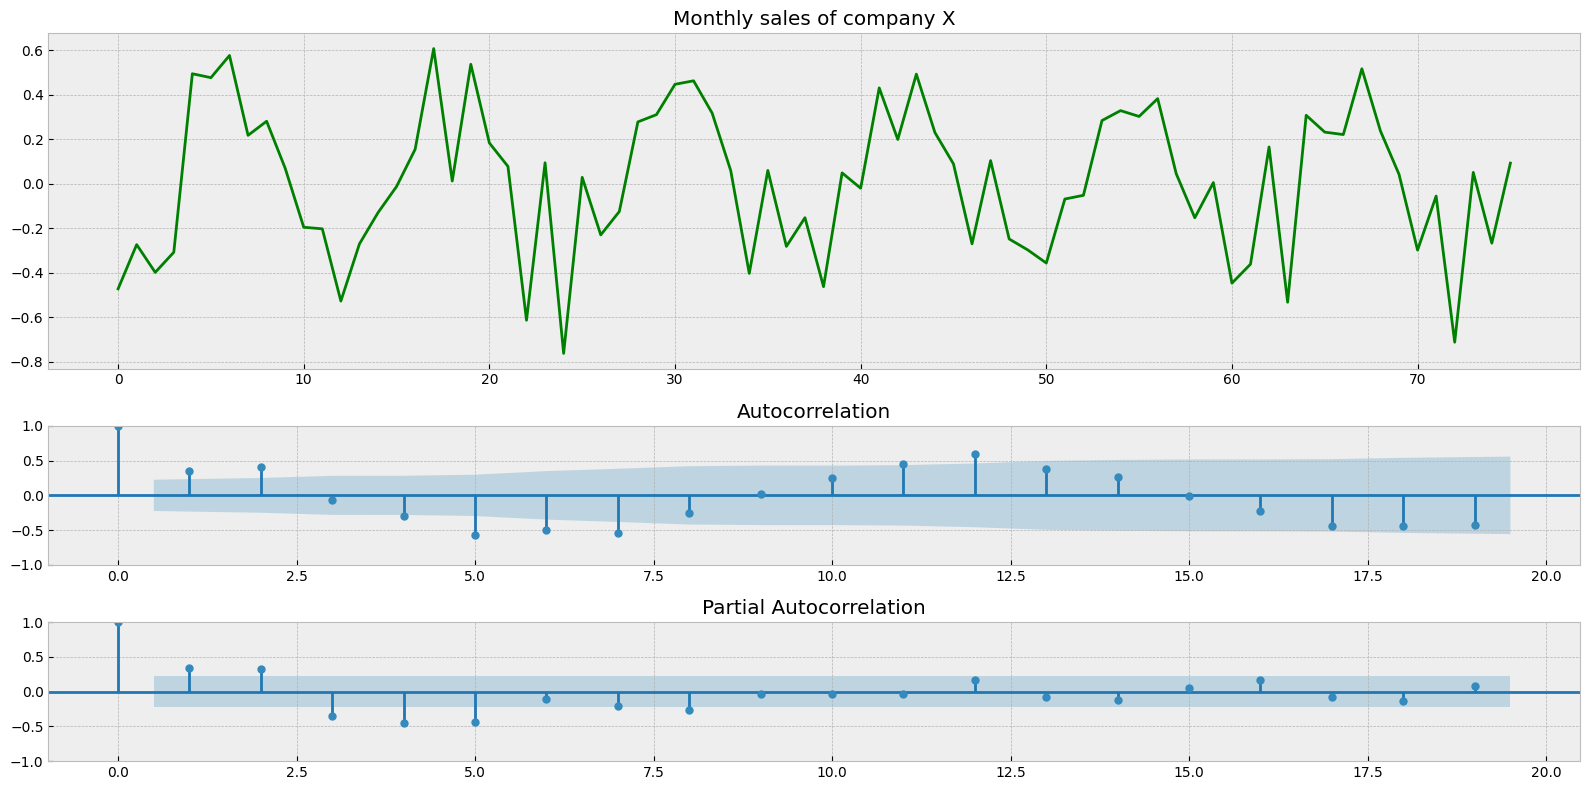

In [19]:
# По графику ряда заметно наличие тренда.
#  Уберем его дифференцированием.

series = series[1:] - series[:-1]

tsplot(series, name)

Тренда нет.

тест Дикки-Фуллера p < 0.05, но заметно влияние сезонности.

Не отвергает гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                -8.151097e+00
p-value                        9.691366e-13
#Lags Used                     9.000000e+00
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


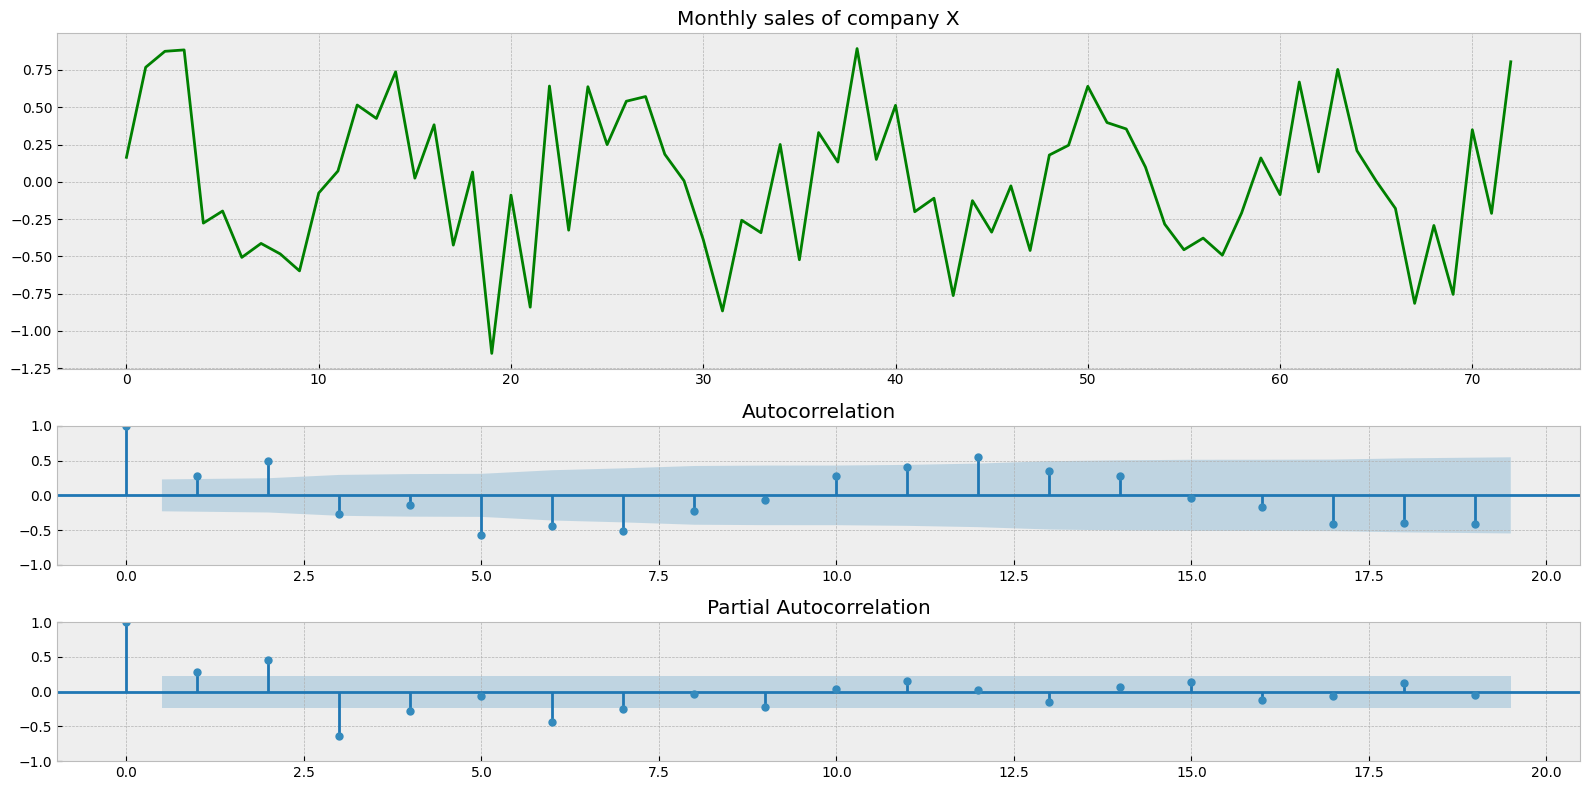

In [20]:
# Уберем влияние сезонности
series = series[3:] - series[:-3]

tsplot(series, name)

тест Дики-Фуллера p < 0.05, графики коррелограмм не отвергают гипотезу о стационарности ряда.

Временной ряд является стационарным

#6 Датасет "Weekly closings of the Dow-Jones industrial average"

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


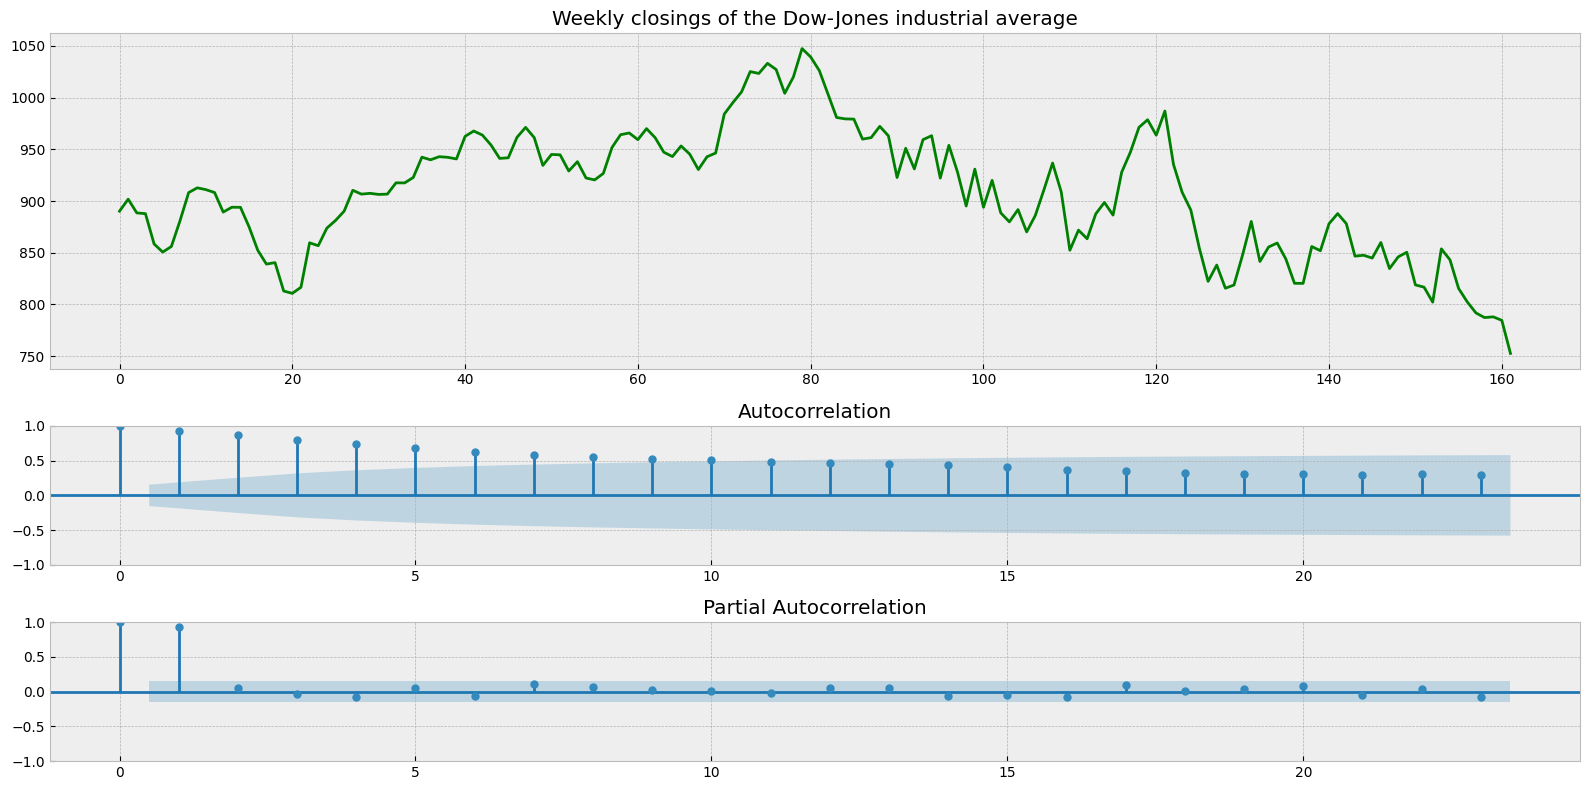

In [21]:
name = 'Weekly closings of the Dow-Jones industrial average'

series = dowjones_closing['Close']

tsplot(series, name)

тест Дики-Фуллера p > 0.05, графики коррелограмм отвергают гипотезу о стационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


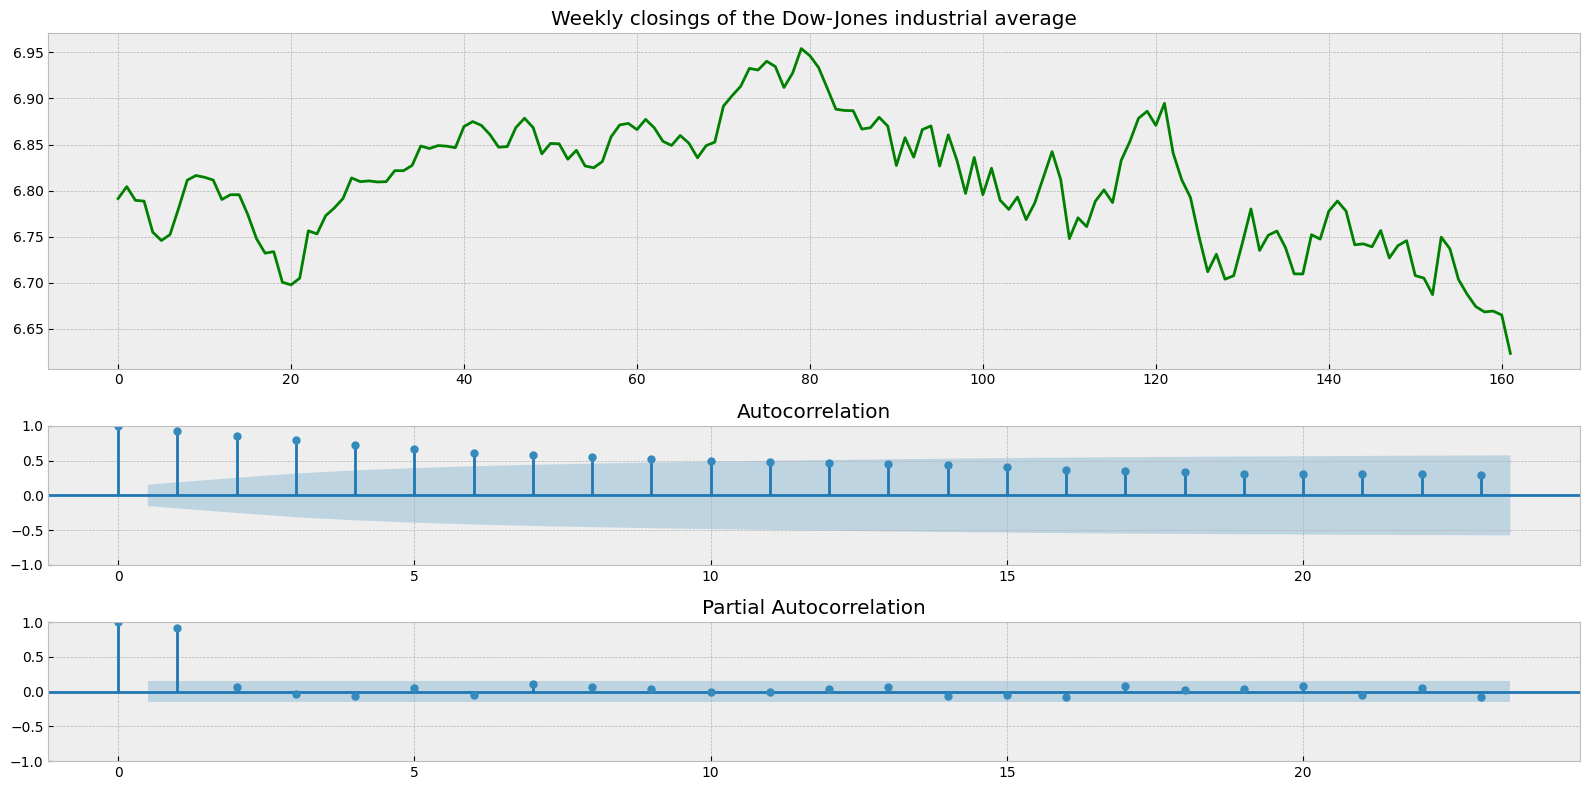

In [22]:
# на графике заметно изменение дисперсии.
# уберем изменение дисперсии при помощи преобразования Бокса-Кокса
series = boxcox(series, 0)

tsplot(series, name)

Размаха дисперсии нет.

тест Дикки-Фуллера p>0.05, графики коррелограмм не отвергает гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


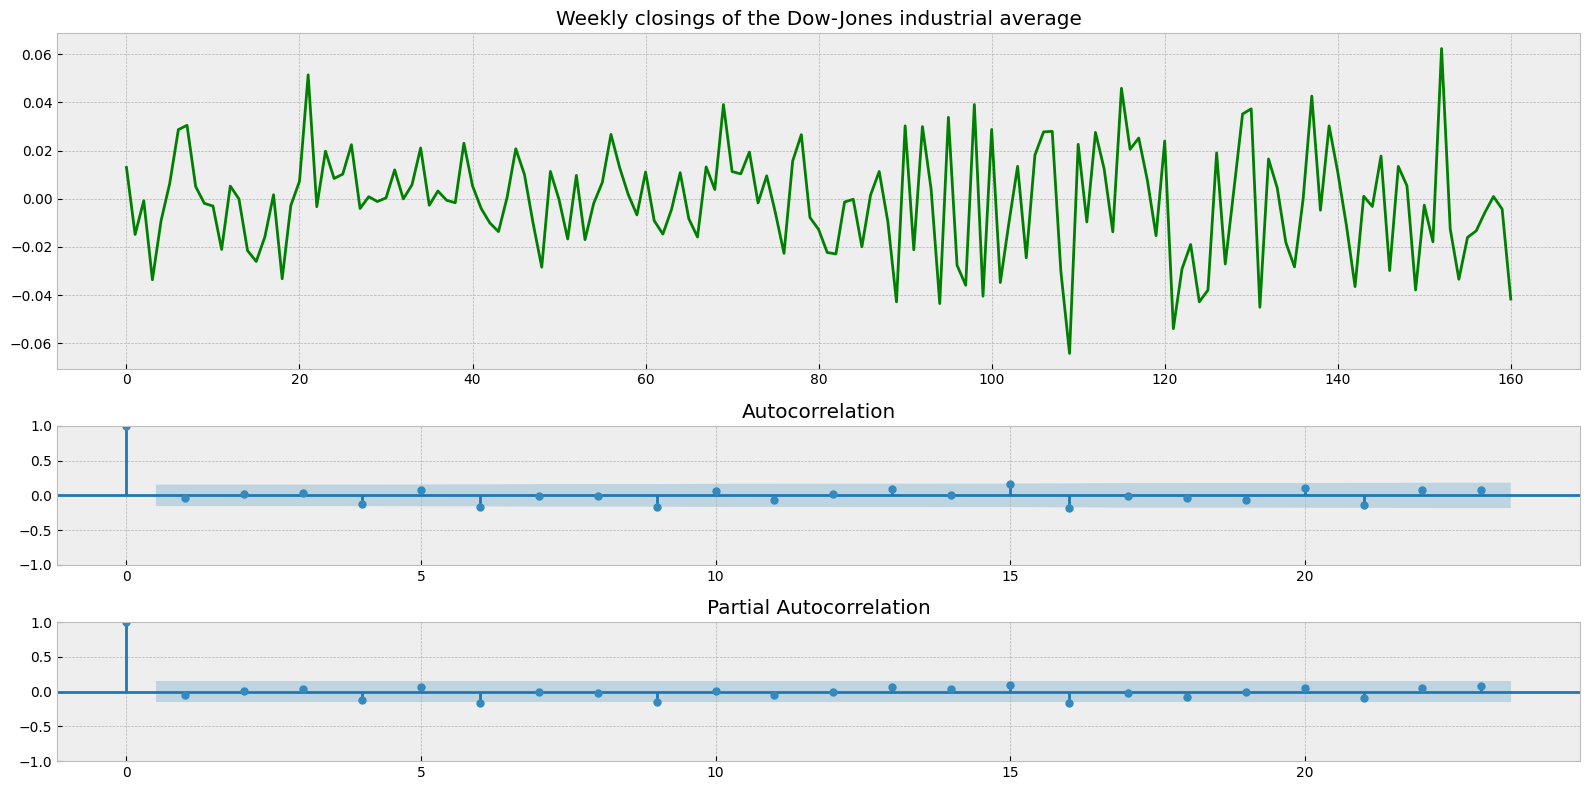

In [23]:
# По графику ряда заметно наличие тренда.
#  Уберем его дифференцированием.

series = series[1:] - series[:-1]

tsplot(series, name)

Тренда нет.

тест Дики-Фуллера p < 0.05, графики коррелограмм не отвергают гипотезу о стационарности ряда.

Временной ряд является стационарным